In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#### Project by Ken, Aarsh, Roy, and Colin

## Data Cleaning

In [2]:
airports = pd.read_csv("airlines.csv")

First, we removed the 'Time.Label' column because it was redundant and hard to use. The 'Time.Month' and 'Time.Year' columns are much easier to use for data.
We also removed the 'Airport.Code' because it isn't important and we already have the 'Airport.Name', so we don't need the airport code.

In [4]:
columns_to_keep = ['Airport.Name', 'Time.Month',
       'Time.Month Name', 'Time.Year', 'Statistics.# of Delays.Carrier',
       'Statistics.# of Delays.Late Aircraft',
       'Statistics.# of Delays.National Aviation System',
       'Statistics.# of Delays.Security', 'Statistics.# of Delays.Weather', 'Statistics.Carriers.Names',
       'Statistics.Carriers.Total',
       'Statistics.Flights.Cancelled', 'Statistics.Flights.Delayed',
       'Statistics.Flights.Diverted', 'Statistics.Flights.On Time',
       'Statistics.Flights.Total', 'Statistics.Minutes Delayed.Carrier',
       'Statistics.Minutes Delayed.Late Aircraft',
       'Statistics.Minutes Delayed.National Aviation System',
       'Statistics.Minutes Delayed.Security',
       'Statistics.Minutes Delayed.Total',
       'Statistics.Minutes Delayed.Weather']

new_airports = airports[columns_to_keep]

We added a new column to display the state name for each airport.

In [6]:
def sort_states(x):
    comma = x.find(",")
    return x[comma + 2:comma+4]

In [7]:
new_airports["Airport.Name"].apply(sort_states)

0       GA
1       MA
2       MD
3       NC
4       DC
        ..
4403    CA
4404    WA
4405    CA
4406    UT
4407    FL
Name: Airport.Name, Length: 4408, dtype: object

In [8]:
new_airports["State.Name"] = new_airports["Airport.Name"].apply(sort_states)

/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


We formed regions out of the states to use in our graphs and charts.

In [10]:
new_england = ['CT', 'ME', 'MA', 'NH', 'RI', 'VT']
mid_atlantic = ["DE", "MD", "NJ", "NY", "PA", "DC"]
south = ['AL', 'AR', 'FL', 'GA', 'KY', 'LA', 'MS','NC', 'SC', 'TN', 'VA', 'WV']
southwest = ["AZ", "NM", "OK", "TX"]
mid_west = ["IL", "IN", "IA", "KS", "MI", "MN", "MO", "NE", "ND", "OH", "SD", "WI"]
west = ["CA", "OR", "WA", "AK", "HI", "NV", "UT", "CO", "WY", "ID", "MT"]

In [11]:
def sort_regions(x):
    if x in new_england:
        return "New England"
    elif x in mid_atlantic:
        return "Mid-Atlantic"
    elif x in south:
        return "South"
    elif x in southwest:
        return "South West"
    elif x in mid_west:
        return "Mid-West"
    elif x in west:
        return "West"

In [12]:
new_airports["Region.Name"] = new_airports["State.Name"].apply(sort_regions)

In [13]:
new_airports

,Airport.Name,Time.Month,Time.Month Name,Time.Year,Statistics.# of Delays.Carrier,Statistics.# of Delays.Late Aircraft,Statistics.# of Delays.National Aviation System,Statistics.# of Delays.Security,Statistics.# of Delays.Weather,Statistics.Carriers.Names,...,Statistics.Flights.On Time,Statistics.Flights.Total,Statistics.Minutes Delayed.Carrier,Statistics.Minutes Delayed.Late Aircraft,Statistics.Minutes Delayed.National Aviation System,Statistics.Minutes Delayed.Security,Statistics.Minutes Delayed.Total,Statistics.Minutes Delayed.Weather,State.Name,Region.Name
0,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",6,June,2003,1009,1275,3217,17,328,"American Airlines Inc.,JetBlue Airways,Contine...",...,23974,30060,61606,68335,118831,518,268764,19474,GA,South
1,"Boston, MA: Logan International",6,June,2003,374,495,685,3,66,"American Airlines Inc.,Alaska Airlines Inc.,Co...",...,7875,9639,20319,28189,24400,99,77167,4160,MA,New England
2,"Baltimore, MD: Baltimore/Washington Internatio...",6,June,2003,296,477,389,8,78,"American Airlines Inc.,Continental Air Lines I...",...,6998,8287,13635,26810,17556,278,64480,6201,MD,Mid-Atlantic
3,"Charlotte, NC: Charlotte Douglas International",6,June,2003,300,472,735,2,54,"American Airlines Inc.,Continental Air Lines I...",...,7021,8670,14763,23379,23804,127,65865,3792,NC,South
4,"Washington, DC: Ronald Reagan Washington National",6,June,2003,283,268,487,4,58,"American Airlines Inc.,Alaska Airlines Inc.,Co...",...,5321,6513,13775,13712,20999,120,52747,4141,DC,Mid-Atlantic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4403,"San Diego, CA: San Diego International",1,January,2016,280,397,171,2,20,"American Airlines Inc.,Alaska Airlines Inc.,Je...",...,5030,6016,15482,23023,6021,79,46206,1601,CA,West
4404,"Seattle, WA: Seattle/Tacoma International",1,January,2016,357,513,351,2,50,"American Airlines Inc.,Alaska Airlines Inc.,Je...",...,8330,9739,25461,32693,11466,73,74017,4324,WA,West
4405,"San Francisco, CA: San Francisco International",1,January,2016,560,947,2194,2,119,"American Airlines Inc.,Alaska Airlines Inc.,Je...",...,8912,13206,43641,72557,153416,66,278610,8930,CA,West
4406,"Salt Lake City, UT: Salt Lake City International",1,January,2016,338,540,253,3,38,"American Airlines Inc.,Alaska Airlines Inc.,Je...",...,7426,8699,32066,33682,8057,57,76978,3116,UT,West


In [14]:
new_airports.to_csv("data_kenneth_colin_aarsh_roy_cleaned.csv")

### Averaging the Statistics for each Airport to Create Graphs

Since the data set contains statistics for 29 major airports, the group decided to average some of the statistics out to get the average of some
column for each airport throughout the years.

In [15]:
master_lst =[]


avg_delayed = []
avg_security = []
avg_weather = []
avg_ineff = []
    
for x in range(0, 29):

    
    total_delay = 0
    total_security = 0
    total_weather = 0
    counter = 0
    for y in range(0, 4408, 29):
        total_delay += new_airports["Statistics.Flights.Delayed"][y+x]
        
        counter += 1
    avg_delayed.append(total_delay // counter)
     
    counter = 0
    
    for y in range(0, 4408, 29):
        total_security += new_airports["Statistics.# of Delays.Security"][y+x]
        counter +=1
    avg_security.append(total_security//counter)
    
    counter = 0
    
    for y in range(0, 4408, 29):
        total_weather += new_airports["Statistics.# of Delays.Weather"][y+x]
        counter +=1
    avg_weather.append(total_weather//counter)
   
    
master_lst.append(avg_delayed)
master_lst.append(avg_security)
master_lst.append(avg_weather)
master_lst[1][28] #first bracket accesses average_list and the second bracket is accesses which airpor

3

## Chart 1: Types of Delays (Pie Chart)

The pie chart displays the proportion for each reason that a flight was delayed.

The pie chart takes into account of five reasons for delay (delays due to carrier, delays due to late aircraft, delays due to national aviation system,
delays due to security, and delays due to weather conditions)

In [16]:
def add_delays(delay):
    ans = 0
    for i in delay:
        ans += i
    return ans

In [17]:
carrier = add_delays(new_airports['Statistics.# of Delays.Carrier'])

In [18]:
late_aircraft = add_delays(new_airports['Statistics.# of Delays.Late Aircraft'])

In [19]:
national_aviation_system = add_delays(new_airports['Statistics.# of Delays.National Aviation System'])

In [20]:
security = add_delays(new_airports['Statistics.# of Delays.Security'])

In [21]:
weather = add_delays(new_airports['Statistics.# of Delays.Weather'])

In [22]:
carrier_percent = carrier / (carrier + late_aircraft + national_aviation_system + security + weather)
late_aircraft_percent = late_aircraft / (carrier + late_aircraft + national_aviation_system + security + weather)
national_aviation_system_percent = national_aviation_system / (carrier + late_aircraft + national_aviation_system + security + weather)
security_percent = security / (carrier + late_aircraft + national_aviation_system + security + weather)
weather_percent = weather / (carrier + late_aircraft + national_aviation_system + security + weather)

In [23]:
carrier_percent + late_aircraft_percent + national_aviation_system_percent + security_percent + weather_percent  #ensures the percentages adds up to one

1.0

In [24]:
list_percent_delays = [carrier_percent, late_aircraft_percent, national_aviation_system_percent, security_percent, weather_percent]

In [25]:
list_reason_labels = ['Carrier', 'Late Aircraft', 'National Aviation System', 'Security', 'Weather']

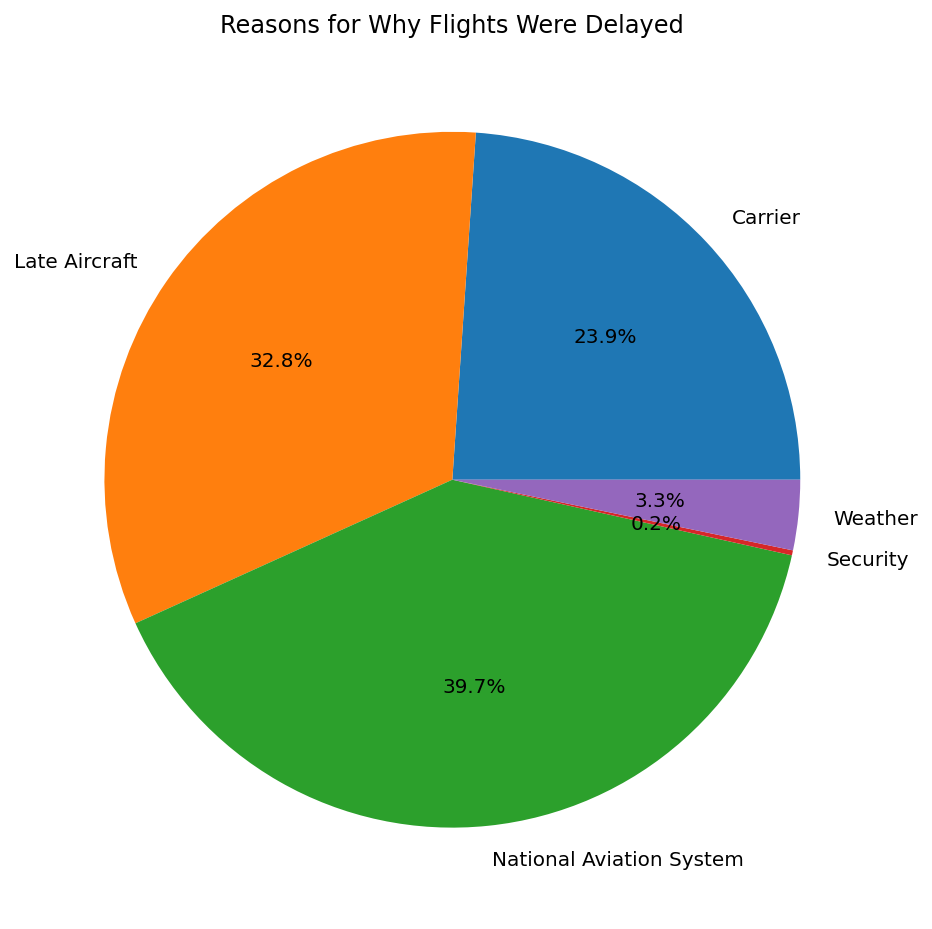

In [54]:
plt.figure(figsize = (8, 8))
plt.title("Reasons for ")
_ = plt.pie(list_percent_delays, labels = list_reason_labels, autopct = "%1.1f%%")

## Chart 2: Which State has the Worst Weather

In [27]:
min_delayed_weather = new_airports.groupby("State.Name", as_index = False).agg({"Statistics.Minutes Delayed.Weather" : "mean"})

In [28]:
min_delayed_weather

,State.Name,Statistics.Minutes Delayed.Weather
0,AZ,4341.539474
1,CA,4984.638158
2,CO,8159.289474
3,DC,3649.476974
4,FL,3189.335526
5,GA,21118.032895
6,IL,9729.467105
7,MA,6093.289474
8,MD,4959.848684
9,MI,6743.947368


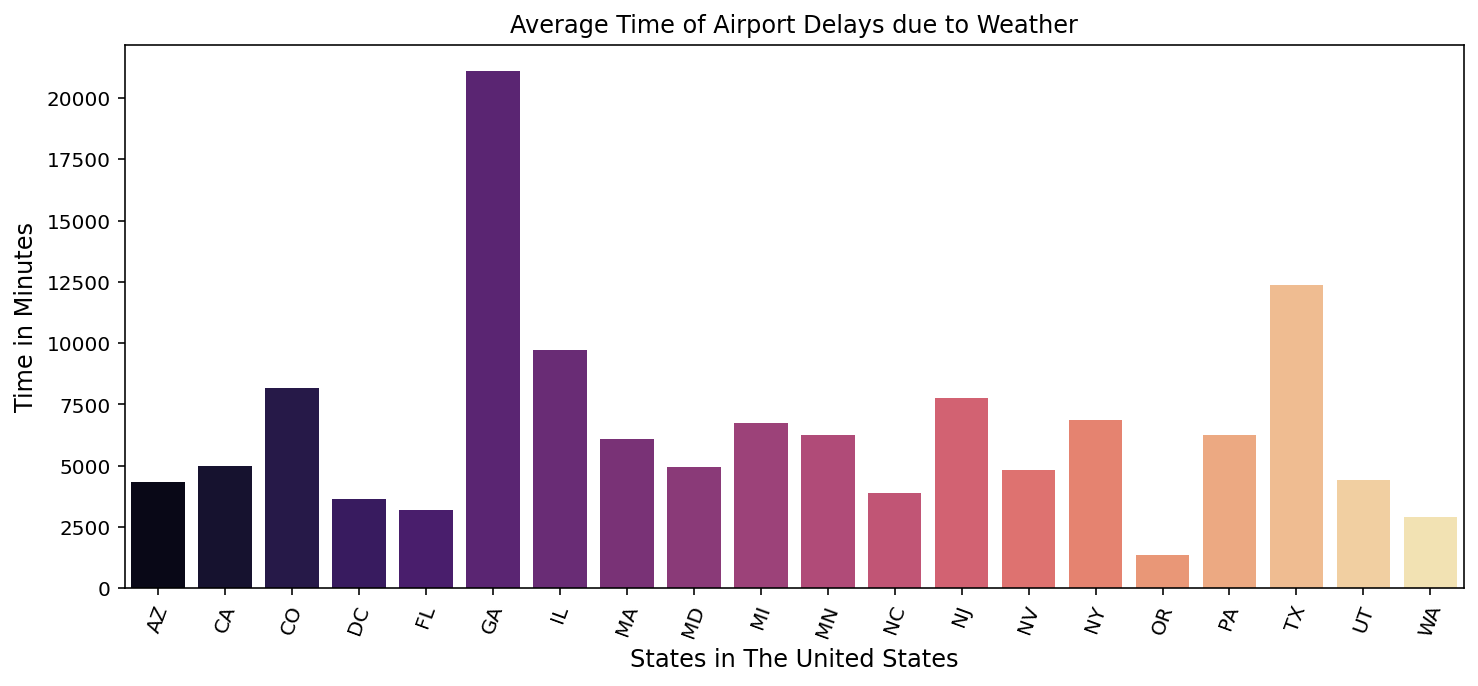

In [60]:
import seaborn as sns
from matplotlib import cm
plt.figure(figsize = (12, 5))
plt.title("Average Time of Airport Delays due to Weather")
_ = sns.barplot(np.arange(20), min_delayed_weather["Statistics.Minutes Delayed.Weather"], palette= "magma")
banana = plt.xticks(ticks = np.arange(20), labels = min_delayed_weather["State.Name"], rotation = 70)
k = plt.ylabel("Time in Minutes", size = "large")
a = plt.xlabel("States in The United States", size = "large")

## Chart 3: Which Airports are the Least Efficient

The airport inefficiency is the average of the delayed, cancelled, and diverted flights. This chart takes every unique airport and displays the total inefficiency.

In [30]:
def averaging_inefficiency(delayed, cancelled, diverted):
    return (delayed + cancelled + diverted) // 3

In [31]:
list_ineff = []
for x in range(new_airports["Statistics.Flights.Delayed"].size):
    delayed = new_airports["Statistics.Flights.Delayed"][x]
    cancelled = new_airports["Statistics.Flights.Cancelled"][x]
    diverted = new_airports["Statistics.Flights.Diverted"][x]
    list_ineff.append(averaging_inefficiency(delayed, cancelled, diverted))

In [32]:
new_airports.insert(23, "Statistics.Flights.Inefficiency", list_ineff, True)  #creates a new inefficiency column in the dataset

In [59]:
avg_ineff = []
for x in range(0, 29):    #creates an average inefficiency list
    
    
    total = 0
    counter = 0
    
    for y in range(0, 4407, 29):
        total += new_airports["Statistics.Flights.Inefficiency"][y+x]
        counter+=1
    
    avg_ineff.append(total // counter)
    
master_lst.append(avg_ineff)
master_lst[2][7]


76

In [34]:
cities = ["Atlanta", "Boston", "Baltimore", "Charlotte", "DC (Reagan)", "Denver", "Dallas", "Detroit", "New York (Newark)", "Fort Lauderdale", "DC (Washington)", "Houston", "New York (JFK)", "Las Vegas" ,"Los Angeles", "New York (La Guardia)", "Orlando", "Chicago (Midway)", "Miami", "Minneapolis", "Chicago (O'Hare)", "Portland", "Philadelphia", "Phoenix", "San Diego", "Seattle", "San Francisco", "Salt Lake City", "Tampa"] #list of city names

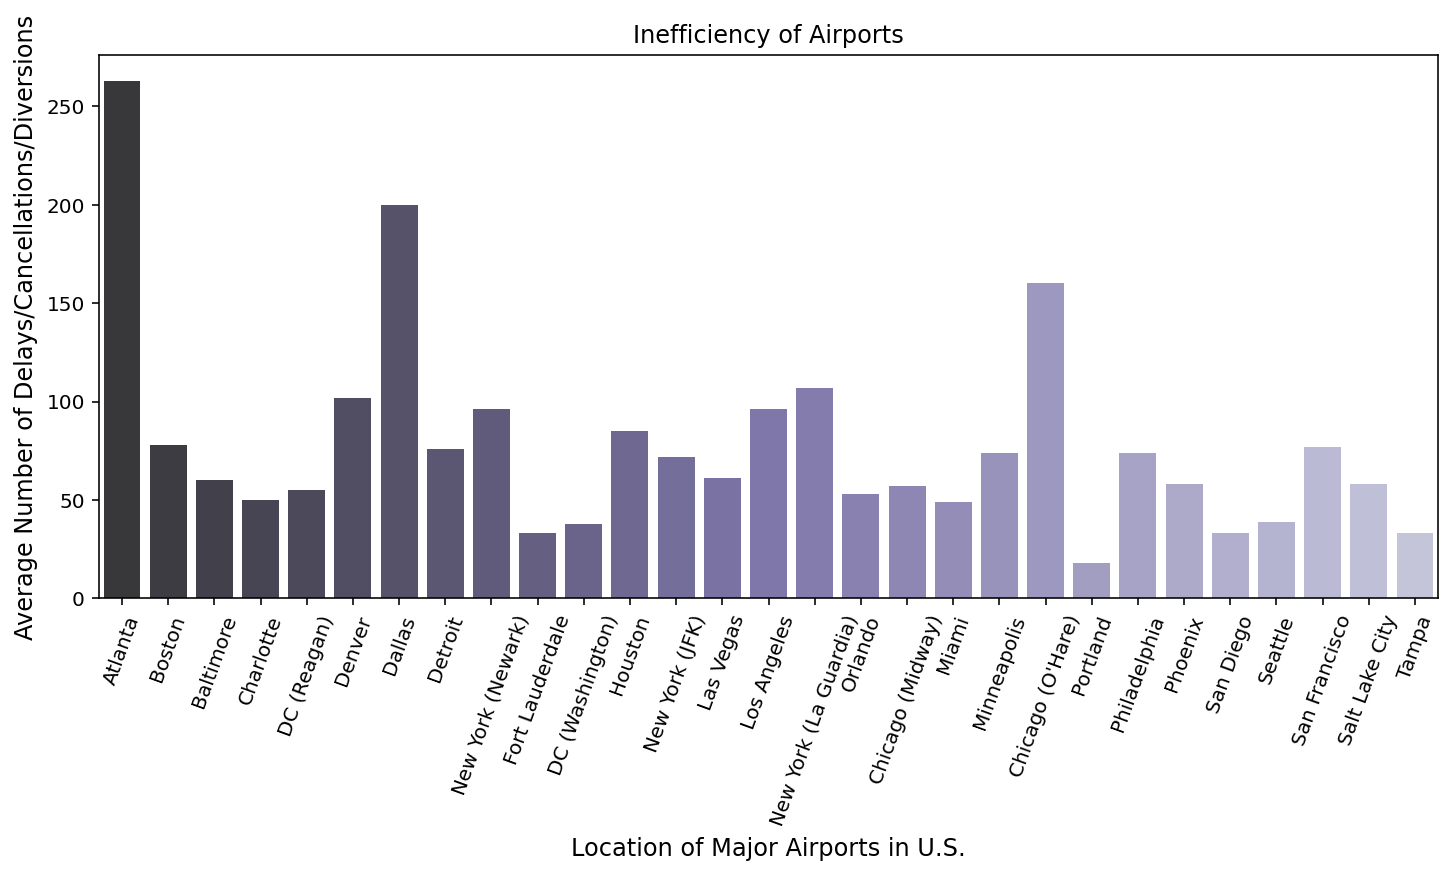

In [35]:
import seaborn as sns
from matplotlib import cm
plt.figure(figsize = (12, 5))

plt.title("Inefficiency of Airports")   #creates a bar graph for inefficiency

plt.xlabel("Location of Major Airports in U.S.", size = "large")
plt.ylabel("Average Number of Delays/Cancellations/Diversions", size = "large")

_ = sns.barplot(np.arange(29), master_lst[2], palette="Purples_d")
banana = plt.xticks(ticks = np.arange(29), labels = cities
                    , rotation = 70)

## Chart 4: Most Common Airline Carriers

For this chart, the group decided to create a word cloud along with a bar chart displaying how frequent each carrier appears in major airports. (Used 2016 data)

In [36]:
from wordcloud import WordCloud, STOPWORDS #import files for a word cloud

In [37]:
list_of_aircrafts = []
for x in range(4379, 4408):
    list_of_aircrafts.append(new_airports["Statistics.Carriers.Names"][x].split(","))
    
type(list_of_aircrafts[0][0])   #extracts carrier names

str

In [38]:
american = 0
alaska = 0
jetblue = 0
delta = 0
express = 0      #makes a list of how many times a certain carrier appears in each major airport
frontier = 0
hawaiian = 0
spirit = 0
skywest = 0
united = 0
virgin = 0
southwest = 0
airlines_lst = []

for x in range(0, len(list_of_aircrafts)):
    for y in range(0, len(list_of_aircrafts[x])):
        if list_of_aircrafts[x][y].find("American") != -1:
            american += 1
            airlines_lst.append("American")
        if list_of_aircrafts[x][y].find("Alaska") != -1:
            alaska += 1
            airlines_lst.append("Alaska")
        if list_of_aircrafts[x][y].find("JetBlue") != -1:
            jetblue += 1
            airlines_lst.append("JetBlue")
        if list_of_aircrafts[x][y].find("Delta") != -1:
            delta += 1
            airlines_lst.append("Delta")
        if list_of_aircrafts[x][y].find("Express") != -1:
            express += 1
            airlines_lst.append("Express")
        if list_of_aircrafts[x][y].find("Frontier") != -1:
            frontier += 1
            airlines_lst.append("Frontier")
        if list_of_aircrafts[x][y].find("Hawaiian") != -1:
            hawaiian += 1
            airlines_lst.append("Hawaiian")
        if list_of_aircrafts[x][y].find("Spirit") != -1:
            spirit += 1
            airlines_lst.append("Sprit")
        if list_of_aircrafts[x][y].find("SkyWest") != -1:
            skywest += 1
            airlines_lst.append("SkyWest")
        if list_of_aircrafts[x][y].find("United") != -1:
            united += 1
            airlines_lst.append("United")
        if list_of_aircrafts[x][y].find("Virgin") != -1:
            virgin += 1
            airlines_lst.append("Virgin")
        if list_of_aircrafts[x][y].find("Southwest") != -1:
            southwest += 1
            airlines_lst.append("Southwest")

In [39]:
airlines_str = " ".join(airlines_lst)

In [40]:
airlines_count = [american,
alaska,
jetblue,
delta,
express,
frontier,
hawaiian,
spirit,
skywest,
united,
virgin,
southwest]

In [41]:
airlines_labels = ['American',
'Alaska',
'JetBlue',
'Delta',
'Express',
'Frontier',
'Hawaiian',
'Spirit',
'SkyWest',
'United',
'Virgin',
'Southwest']

In [42]:
wordcloud = WordCloud(background_color = 'white', scale = 2, stopwords = STOPWORDS).generate(airlines_str)

(-0.5, 799.5, 399.5, -0.5)

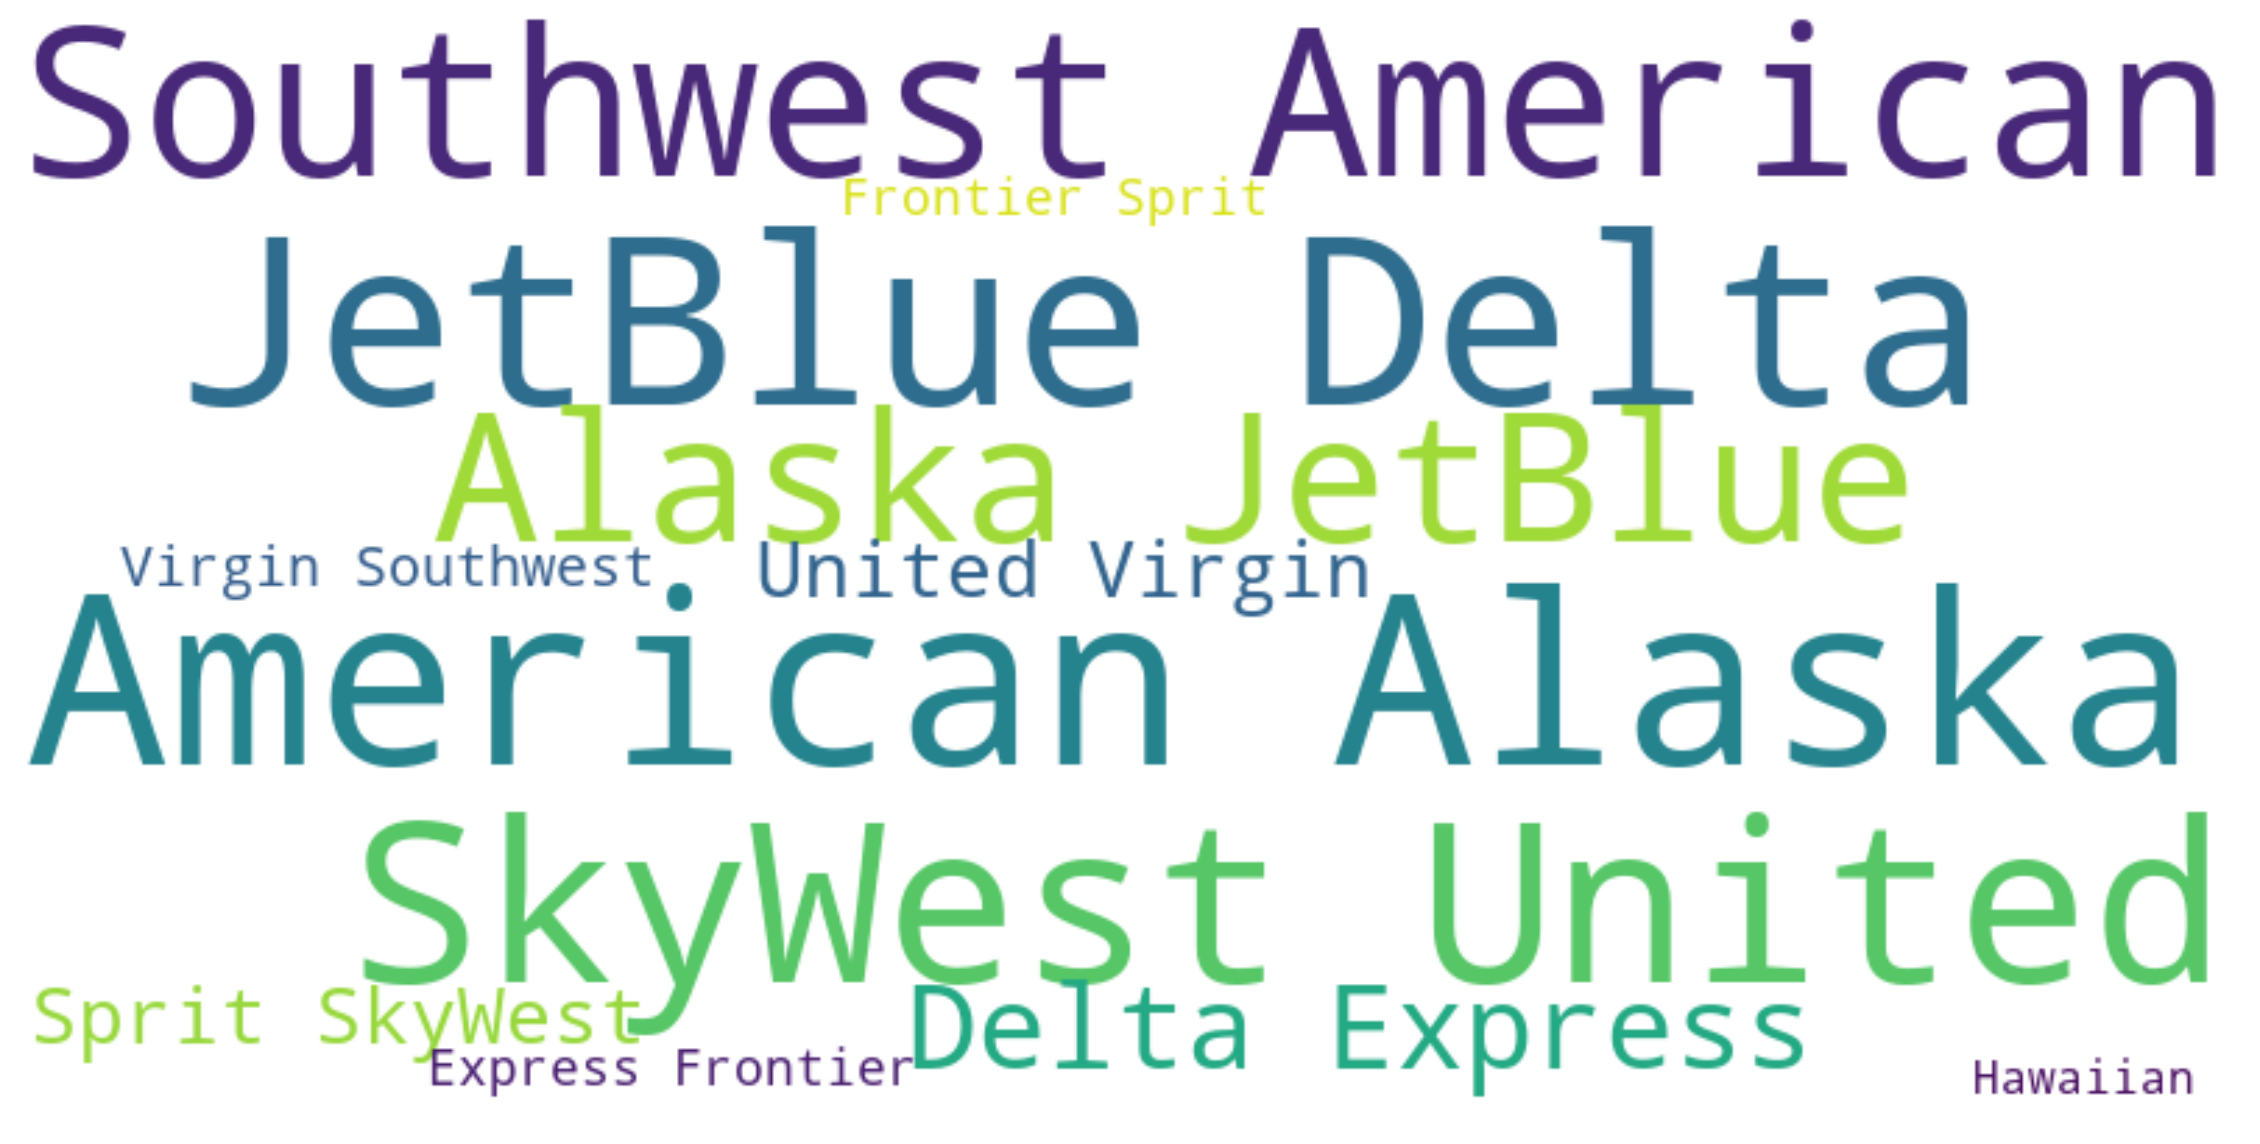

In [43]:
plt.figure(figsize = (20, 20))
plt.imshow(wordcloud, interpolation='bilinear')     #creates wordcloud
plt.axis("off")

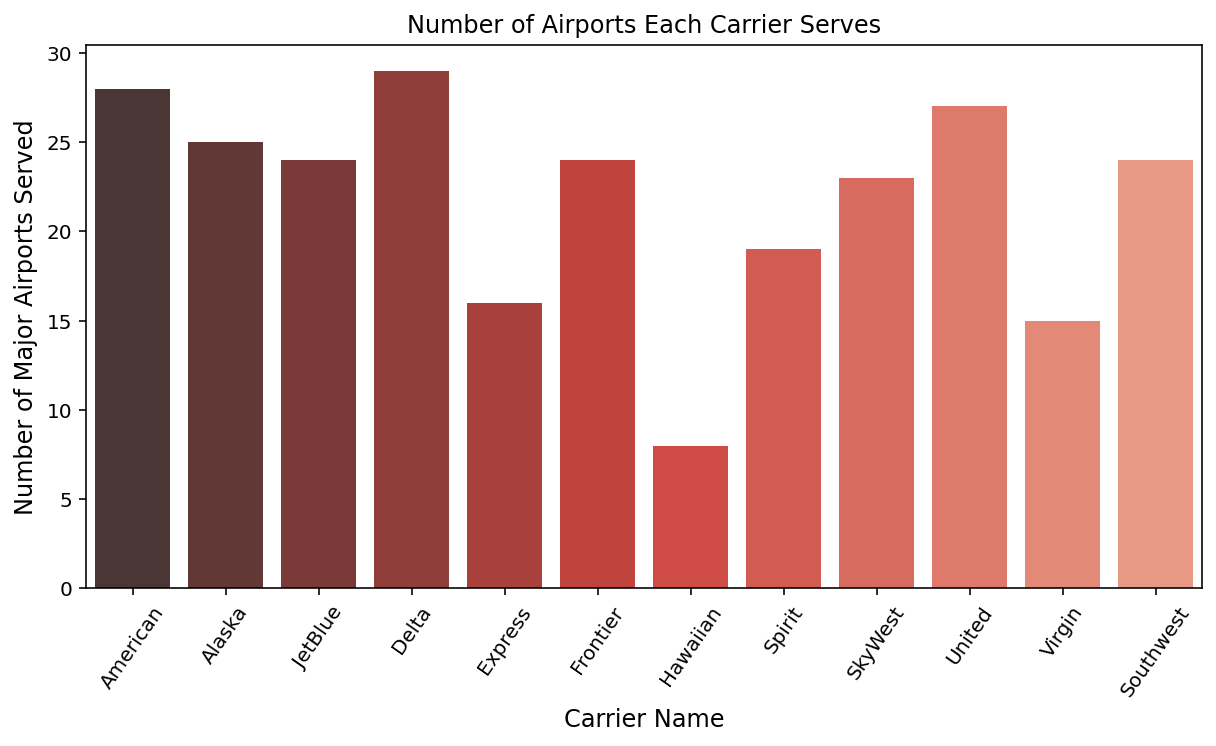

In [44]:
import seaborn as sns
from matplotlib import cm
plt.figure(figsize = (10, 5))

plt.title("Number of Airports Each Carrier Serves")

plt.xlabel("Carrier Name", size = "large")
plt.ylabel("Number of Major Airports Served", size = "large")

_ = sns.barplot(np.arange(12), airlines_count, palette="Reds_d")       #creates bar chart showing carrier frequency
banana = plt.xticks(ticks = np.arange(12), labels = airlines_labels
                    , rotation = 55)

## Chart 5: Busiest Months for Domestic Travel

Created a bar chart displaying how many flights were conducted during each month

In [45]:
months = new_airports.groupby('Time.Month', as_index=False).agg({'Statistics.Flights.Total' : 'sum'}) #grouped by month and took sum of all flights in month

In [46]:
months

,Time.Month,Statistics.Flights.Total
0,1,4363555
1,2,3761574
2,3,4275438
3,4,4128093
4,5,4238046
5,6,4588297
6,7,4754762
7,8,4726347
8,9,4336206
9,10,4524038


In [47]:
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

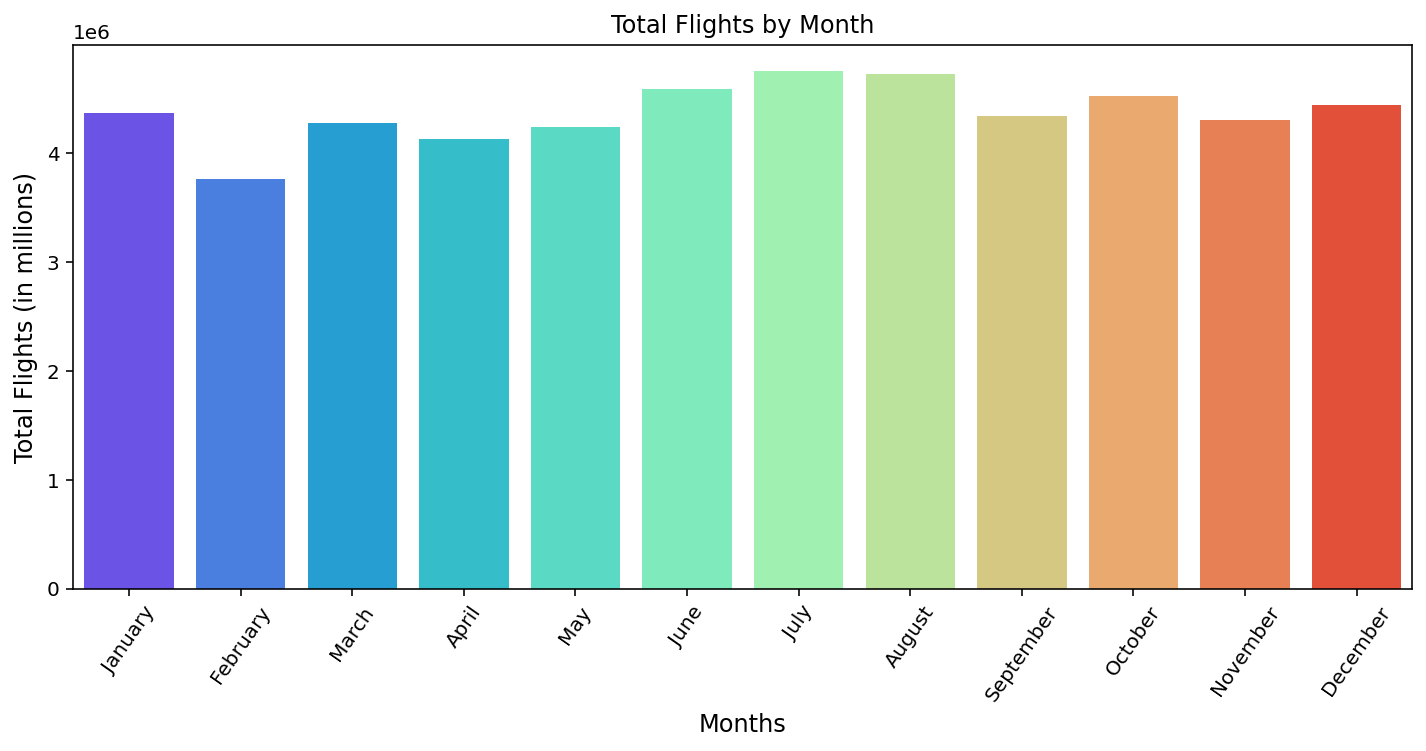

In [58]:
import seaborn as sns
from matplotlib import cm
plt.figure(figsize = (12, 5))

plt.title("Total Flights by Month")


_ = sns.barplot(np.arange(12), months['Statistics.Flights.Total'], palette="rainbow")       #creates bar chart showing carrier frequency
banana = plt.xticks(ticks = np.arange(12), labels = month_names
                    , rotation = 55)
p = plt.xlabel("Months", size = "large")
h = plt.ylabel("Total Flights (in millions)", size = "large")